# Introduction


Author: Jørn Rasmussen
Email: Jornras -at- hotmail.com

# Importing  general libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import chdir

# Importing machine learning libraries

In [43]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Setting the current working directory

In [7]:
chdir("D:\Onedrive\EnviDan\Machine Learning A-Z\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)")

# Loading the dataset

In [20]:
dataset = pd.read_csv('Position_Salaries.csv')

In [41]:
dataset[0:3]

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


# Cleaning the data

# Splitting the data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

NameError: name 'train_test_split' is not defined

# Dividing into predictor and target variables

In [33]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Feature scaling

In [35]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

# Fitting the machine learning model

In [36]:
regressor = SVR(kernel = 'rbf')


In [38]:
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Prediction

In [39]:
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)

# Visualization

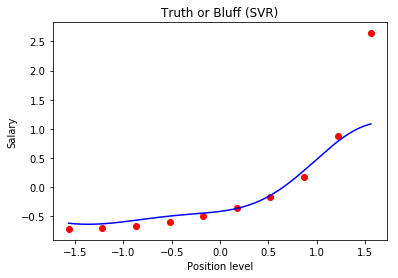

In [40]:
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()